In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pandas as pd
import math
import random
import csv

from numpy import sqrt, exp

In [2]:

def read_dataset(file_path):
    return pd.read_csv(file_path, sep=',', header=0)

def get_histogram(dataset, state='TX', year='2020'):
    histogram_list = [0] * 12
    dataset_pd = read_dataset(dataset)

    filtered = dataset_pd[
        (dataset_pd['state'] == state) & 
        (dataset_pd['date'].str.startswith(year))
    ]

    for i in range(filtered['positive'].values.size):
        histogram_list[i] = filtered['positive'].values[i]

    return histogram_list

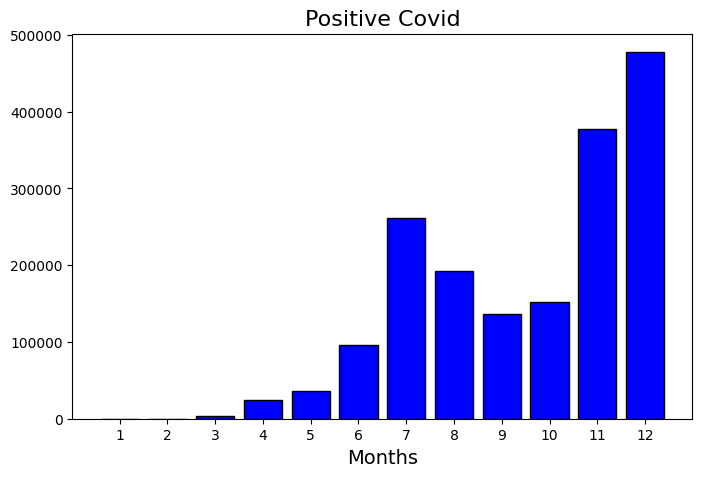

In [16]:
import matplotlib.pyplot as plt
heights = get_histogram('./covid19-states-history.csv')

x_labels = range(1, 13)

plt.figure(figsize=(8, 5))
plt.bar(x_labels, heights, color='blue', edgecolor='black')

plt.title("Positive Covid", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.xticks(x_labels)
plt.show()


In [31]:
def get_dp_histogram(dataset, state, year, epsilon, N):
    dp_histogram = get_histogram(dataset, state, year)
    sensitivity = N

    for i in range(len(dp_histogram)):
        dp_histogram[i] = dp_histogram[i] + np.random.laplace(0, (sensitivity/epsilon))
        #it doesn't make any sense for the number of infected people to be negative
        # if dp_histogram[i] < 0:
        #     dp_histogram[i] = 0

    return dp_histogram

[-3.1152779166541587, -3.6920696740567895, 3264.58654171145, 24826.025225171983, 36188.111409618, 95697.75560809193, 260962.14336794455, 192022.42763411763, 135998.17246748894, 151632.38229672084, 377822.9232832652, 477734.95212036645]


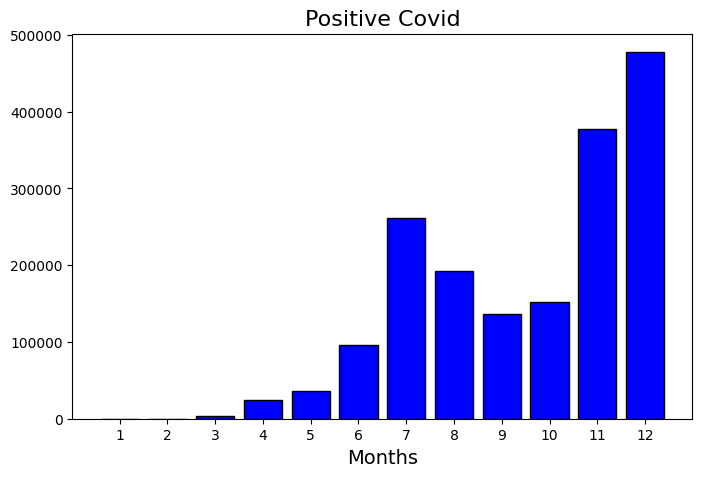

In [34]:
heights = get_dp_histogram('./covid19-states-history.csv', state='TX', year='2020', epsilon=0.5, N=2)
print(heights)
x_labels = range(1, 13)

plt.figure(figsize=(8, 5))
plt.bar(x_labels, heights, color='blue', edgecolor='black')

plt.title("Positive Covid", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.xticks(x_labels)
plt.show()